In [26]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [27]:
def font_size_detection_model():


    #early stopping based on validation loss
    early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
    #This callback will stop the training when there is no improvement in
    # the validation loss for three consecutive epochs.

    #CSVLogger logs epoch, acc, loss, val_acc, val_loss
    log_csv = CSVLogger('font_size_detection_model_logs.csv', separator=',', append=False)
    callbacks_list = [ early_stop, log_csv]
    
    
    # bulding model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),     
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1
    tf.keras.layers.Dense(10, activation='softmax')
    ])



    model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])
    
    model.summary()    


    train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)


    train_generator = train_datagen.flow_from_directory(
        'E:\\assignments_DRkhaled\\font_detection\\font_size',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64*64
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        subset='training')
 
    validation_datagen = train_datagen.flow_from_directory(
     'E:\\assignments_DRkhaled\\font_detection\\font_size', # same directory as training data
    target_size=(64, 64),
    batch_size=10,
    class_mode='categorical',
    subset='validation') # set as validation data
    
         
    # model fitting
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=6368 /10 ,  
      epochs=15,
      verbose=1, 
     callbacks=callbacks_list,
     validation_data=validation_datagen,
     validation_steps=1587 /10)
    

    
    return history

In [28]:
history3=font_size_detection_model()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 64)         

# total training time is about 1,560

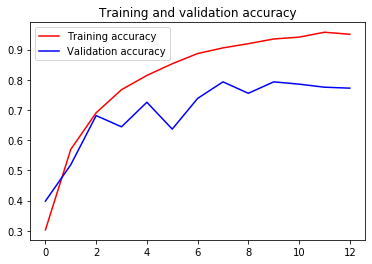

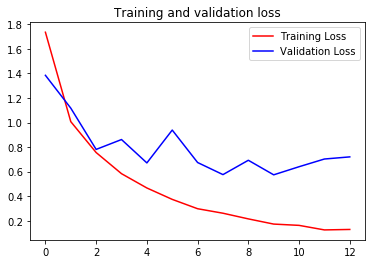

In [29]:
import matplotlib.pyplot as plt
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# make the model more complex

In [30]:
def font_size_detection_model2():


    #early stopping based on validation loss
    early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
    #This callback will stop the training when there is no improvement in
    # the validation loss for three consecutive epochs.

    #CSVLogger logs epoch, acc, loss, val_acc, val_loss
    log_csv = CSVLogger('font_size_detection_model2_logs.csv', separator=',', append=False)
    callbacks_list = [ early_stop, log_csv]
    
    
    # bulding model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
 
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        
        
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        
       
   
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1
    tf.keras.layers.Dense(10, activation='softmax')
    ])



    model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])
    
    model.summary()    
         


    train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)


    train_generator = train_datagen.flow_from_directory(
        'E:\\assignments_DRkhaled\\font_detection\\font_size',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64*64
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        subset='training')
 
    validation_datagen = train_datagen.flow_from_directory(
     'E:\\assignments_DRkhaled\\font_detection\\font_size', # same directory as training data
    target_size=(64, 64),
    batch_size=10,
    class_mode='categorical',
    subset='validation') # set as validation data
    
         
    # model fitting
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=6368 /10 ,  
      epochs=15,
      verbose=1, 
     callbacks=callbacks_list,
     validation_data=validation_datagen,
     validation_steps=1587 /10)
    

    
    return history

In [31]:
history2=font_size_detection_model()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 6, 6, 64)         

# training time is about 495 second

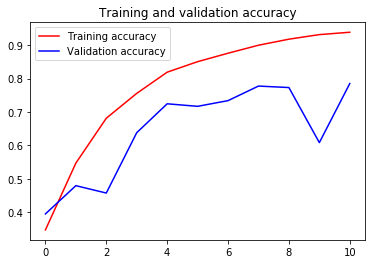

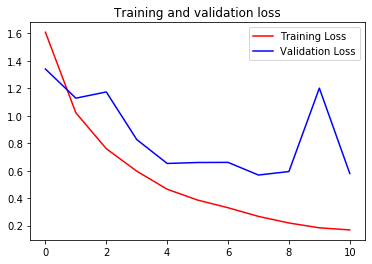

In [32]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()